<a href="https://colab.research.google.com/github/AAA0145/DesignOptimization2021Fall/blob/main/Homework3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

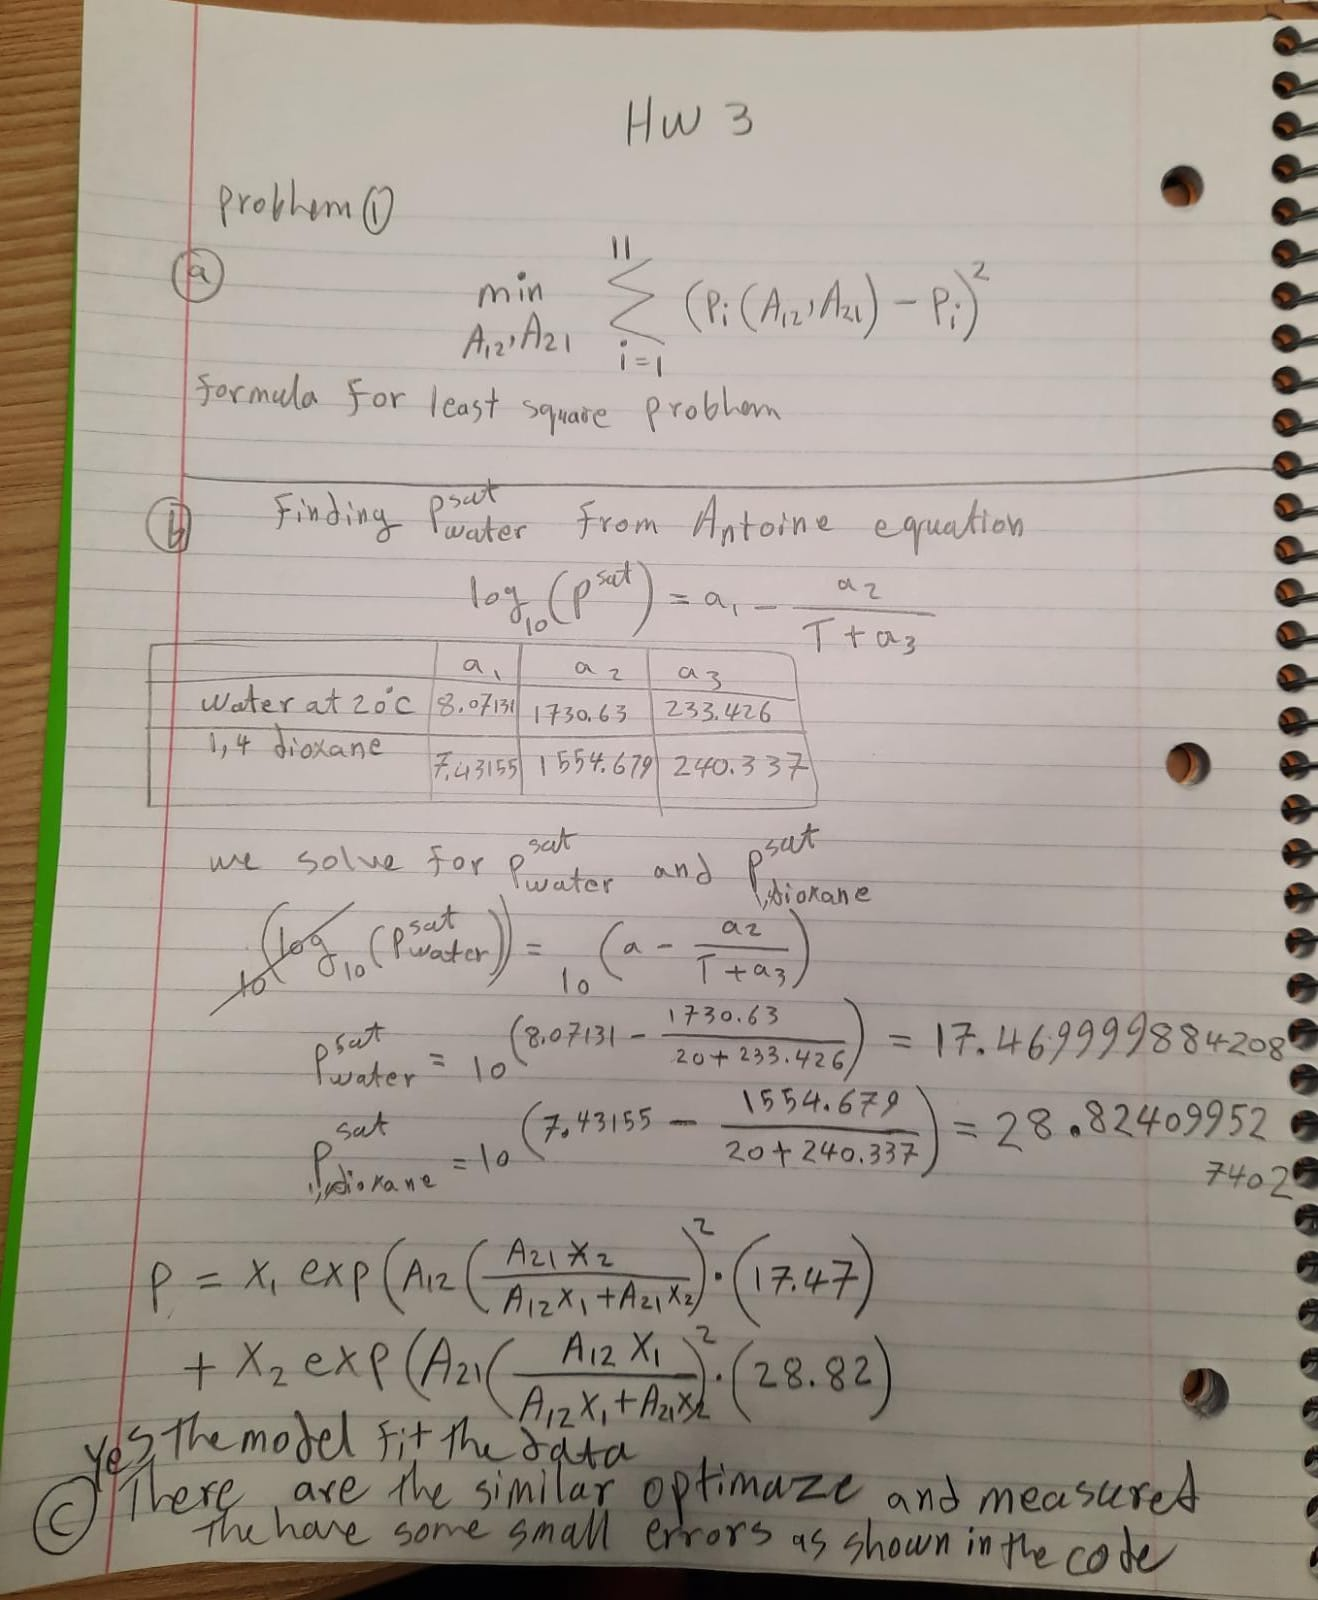

[1.9586589 1.6894484]
0.0009000412
optimized_p = 28.824099527402      measured_p = 28.1
Error between optimuzed and measured P value = -0.7240995274020001
optimized_p = 34.64448606951793      measured_p = 34.4
Error between optimuzed and measured P value = -0.24448606951793295
optimized_p = 36.452916140201005      measured_p = 36.7
Error between optimuzed and measured P value = 0.24708385979899816
optimized_p = 36.867066983563305      measured_p = 36.9
Error between optimuzed and measured P value = 0.03293301643669366
optimized_p = 36.873717907887155      measured_p = 36.8
Error between optimuzed and measured P value = -0.07371790788715771
optimized_p = 36.749670313068236      measured_p = 36.7
Error between optimuzed and measured P value = -0.04967031306823344
optimized_p = 36.39053827701672      measured_p = 36.5
Error between optimuzed and measured P value = 0.1094617229832835
optimized_p = 35.38517956926319      measured_p = 35.4
Error between optimuzed and measured P value = 0.014

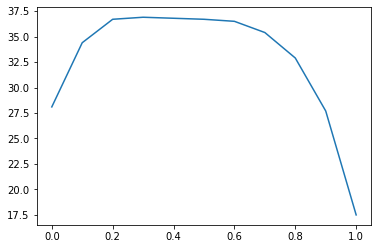

In [3]:
# Problem 1 part b
# Here is a code for gradient descent without line search
from matplotlib import pyplot
import torch as t
from torch.autograd import Variable
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import math as m
p_measured=np.array([28.1,34.4,36.7,36.9,36.8,36.7,36.5,35.4,32.9,27.7,17.5])
x_1=np.array([0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0])
x_2=-x_1+1
p_water = 17.469999884208
p_dioxane = 28.824099527402
x = Variable(t.tensor([1.0, 1.0]), requires_grad=True)
a = 0.001
for i in range(100):  
    for i in range(0,11):        
        loss = (((x_1[i]*t.exp(x[0]*((x[1]*x_2[i])/(x[0]*x_1[i]+x[1]*x_2[i]))**2)*p_water) + (x_2[i]*t.exp( x[1]*((x[0]*x_1[i])/(x[0]*x_1[i]+x[1]*x_2[i]))**2)*p_dioxane)) - p_measured[i])**2    
        loss.backward()
    x.grad.numpy()
    with t.no_grad():
       x -= a * x.grad       
       x.grad.zero_()       
print(x.data.numpy())
print(loss.data.numpy())
for i in range(0,11):
  P_optimized = ((x_1[i]*m.exp(x[0]*((x[1]*x_2[i])/(x[0]*x_1[i]+x[1]*x_2[i]))**2)*p_water) + (x_2[i]*m.exp( x[1]*((x[0]*x_1[i])/(x[0]*x_1[i]+x[1]*x_2[i]))**2)*p_dioxane))
  print("optimized_p =",P_optimized, "     measured_p =", p_measured[i])
  print("Error between optimuzed and measured P value =" , p_measured[i]-P_optimized)
plt.plot(x_1,p_measured)
#plt.plot(x_1,P_optimized)

In [4]:
!pip install bayesian-optimization

from bayes_opt import BayesianOptimization


def function(x, y):
    return -((4-2.1*x**2+(x**4)/3)*x**2+x*y+(-4+4*y**2)*y**2)
pbounds = {'x': (-3, 3), 'y': (-2, 2)}

optimizer = BayesianOptimization(f=function,pbounds=pbounds,random_state=1)

optimizer.maximize(init_points=2,n_iter=10)
print(optimizer.max)


  Created wheel for bayesian-optimization: filename=bayesian_optimization-1.2.0-py3-none-any.whl size=11685 sha256=2dabdeef9b36299bd6f2598e860e5dc7880015981e14e8b63832da2a8ad91e1e
  Stored in directory: /root/.cache/pip/wheels/fd/9b/71/f127d694e02eb40bcf18c7ae9613b88a6be4470f57a8528c5b
Successfully built bayesian-optimization
|   iter    |  target   |     x     |     y     |
-------------------------------------------------
|  1        |  0.265    | -0.4979   |  0.8813   |
|  2        | -110.1    | -2.999    | -0.7907   |
|  3        | -14.48    | -2.347    | -0.5245   |
|  4        | -3.791    |  1.98     |  0.6406   |
|  5        | -3.61     | -2.104    |  0.5152   |
|  6        | -20.73    | -2.484    |  1.035    |
|  7        | -8.23     | -0.6262   | -1.354    |
|  8        | -12.31    |  2.326    | -0.2112   |
|  9        |  0.06557  | -0.4062   | -0.5919   |
|  10       | -0.4875   |  0.6594   | -0.4285   |
|  11       |  0.262    |  0.3192   |  0.8082   |
|  12       | -5.892  